In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("hotel_booking.csv")
pd.set_option("display.max_columns", None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#check duplicate data
print('rows of duplicated data:', df.duplicated().sum())

rows of duplicated data: 0


In [5]:
#copy data for backup
df2 = df.copy()

In [6]:
#drop duplicate
df.drop_duplicates(keep='first', inplace=True)

In [7]:
#check duplicate data
print('rows of duplicated data after drop :', df.duplicated().sum())

rows of duplicated data after drop : 0


In [8]:
#check after duplicated
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# Check the null values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
## Handling null values
# Null values in 'children' column could mean 0 children
df['children'] = df['children'].fillna(0)
# According to the research paper attached to the dataset, null values in 'agent' and 'company' means the booking did not came from a travel agent. I will replace it with 0, which means 'Not applicable'. 
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
# Check null values again
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
# Fix the data type
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [13]:
#check the value of meal
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [14]:
# Fix incorrect value
# Replace 'Undefined' in 'meal' column with 'No Meal'
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')
df['meal'].value_counts()

BB         92310
HB         14463
SC         10650
No Meal     1169
FB           798
Name: meal, dtype: int64

In [15]:
#check data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
# Remove unnecessary data with 0 guest and 0 night
# Create new column 'total_guests' from the combination of 'adults', 'children', 'babies' columns
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))
# Create new column 'stay_duration' from the combination of 'stays_in_weekend_nights' and 'stays_in_weekdays_nights'
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
print('Data with 0 night: {0} out of {1} all data'.format(df[df['stay_duration'] == 0].shape[0], df.shape[0]))
# Remove unnecessary data
df_clean = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)].copy()

print('before pre-processing:', df.shape[0])
print('after pre-processing:', df_clean.shape[0])

Data with 0 guest: 180 out of 119390 all data
Data with 0 night: 715 out of 119390 all data
before pre-processing: 119390
after pre-processing: 118565


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_week_nights            118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  int64  
 11  babies                          118565 non-null  int64  
 12  meal            

In [18]:
df_clean.to_csv('Data_Hotel_Cleaning.csv', index=False)

In [19]:
df_baru = pd.read_csv("Data_Hotel_Cleaning.csv")
df_baru

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_guests,stay_duration
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1,1
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1,1
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2,2
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,2,2
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118560,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,2,7
118561,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,3,7
118562,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,2,7
118563,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,2,7


In [20]:
df_baru.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,stay_duration
is_canceled,1.000000,0.291515,0.015438,0.009019,-0.006108,-0.004859,0.020703,0.057575,0.004678,-0.032672,-0.077791,0.109974,-0.057541,-0.145198,-0.046315,-0.083745,0.053941,0.039368,-0.196804,-0.236165,0.044237,0.013554
lead_time,0.291515,1.000000,0.039622,0.127876,0.002461,0.082917,0.163155,0.116980,-0.038276,-0.021035,-0.116125,0.085885,-0.073787,0.001221,-0.012911,-0.085839,0.169904,-0.073513,-0.117524,-0.096993,0.069514,0.154414
arrival_date_year,0.015438,0.039622,1.000000,-0.540308,0.000324,0.020258,0.029245,0.030287,0.054989,-0.013047,0.012425,-0.120345,0.029280,0.031584,0.058069,0.033968,-0.056699,0.197783,-0.014256,0.109633,0.052988,0.029797
arrival_date_week_number,0.009019,0.127876,-0.540308,1.000000,0.066592,0.019177,0.016801,0.026907,0.005754,0.010165,-0.033166,0.035660,-0.021151,0.006180,-0.018933,-0.033263,0.022845,0.078378,0.002105,0.025809,0.026105,0.020079
arrival_date_day_of_month,-0.006108,0.002461,0.000324,0.066592,1.000000,-0.016399,-0.028703,-0.001414,0.014485,-0.000225,-0.005254,-0.027087,-0.000299,0.011308,0.000072,0.003853,0.022558,0.030507,0.008567,0.003346,0.006878,-0.027877
stays_in_weekend_nights,-0.004859,0.082917,0.020258,0.019177,-0.016399,1.000000,0.490977,0.093893,0.045979,0.018681,-0.078221,-0.013286,-0.043058,0.051159,0.164237,-0.080402,-0.055164,0.040978,-0.019367,0.072955,0.103191,0.759384
stays_in_week_nights,0.020703,0.163155,0.029245,0.016801,-0.028703,0.490977,1.000000,0.095039,0.044446,0.020499,-0.083505,-0.014734,-0.049232,0.081638,0.199648,-0.043502,-0.002923,0.053201,-0.026189,0.068502,0.103504,0.939662
adults,0.057575,0.116980,0.030287,0.026907,-0.001414,0.093893,0.095039,1.000000,0.028881,0.017751,-0.143264,-0.007189,-0.108832,-0.041322,0.023240,-0.165502,-0.008581,0.224443,0.014116,0.122959,0.818675,0.107852
children,0.004678,-0.038276,0.054989,0.005754,0.014485,0.045979,0.044446,0.028881,1.000000,0.024182,-0.031664,-0.024835,-0.021062,0.051316,0.050284,-0.042369,-0.033404,0.328607,0.056384,0.081978,0.581426,0.051251
babies,-0.032672,-0.021035,-0.013047,0.010165,-0.000225,0.018681,0.020499,0.017751,0.024182,1.000000,-0.009123,-0.007523,-0.006596,0.086213,0.030328,-0.009394,-0.010650,0.029413,0.037205,0.097875,0.163298,0.022646


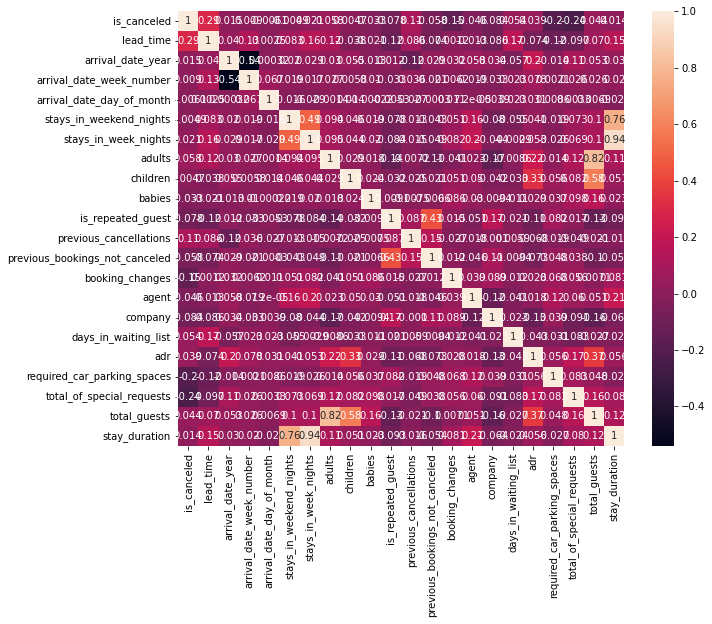

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df_baru.corr(),annot=True)
plt.show()

In [22]:
df_baru['reservation_status_date'] = pd.to_datetime(df_baru['reservation_status_date'])
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118565 entries, 0 to 118564
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118565 non-null  object        
 1   is_canceled                     118565 non-null  int64         
 2   lead_time                       118565 non-null  int64         
 3   arrival_date_year               118565 non-null  int64         
 4   arrival_date_month              118565 non-null  object        
 5   arrival_date_week_number        118565 non-null  int64         
 6   arrival_date_day_of_month       118565 non-null  int64         
 7   stays_in_weekend_nights         118565 non-null  int64         
 8   stays_in_week_nights            118565 non-null  int64         
 9   adults                          118565 non-null  int64         
 10  children                        118565 non-null  int64  

In [29]:
nums= ['stay_duration', 'total_guests', 'total_of_special_requests', 'required_car_parking_spaces', 'days_in_waiting_list',
       'booking_changes', 'babies', 'children', 'adults', 'stays_in_week_nights', 
       'stays_in_weekend_nights']

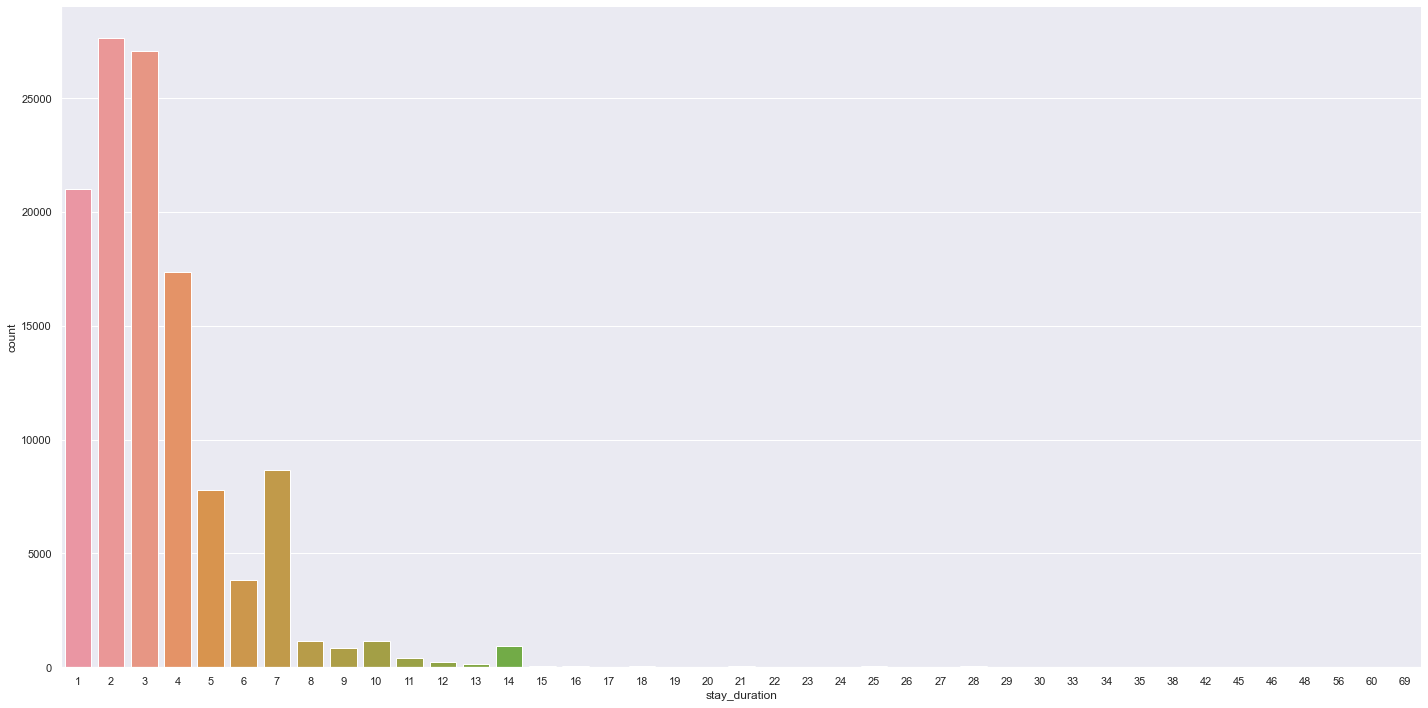

In [62]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,10)})
sns.catplot(x='stay_duration', 
            data=df_baru, 
            kind="count",height = 10, aspect = 2)


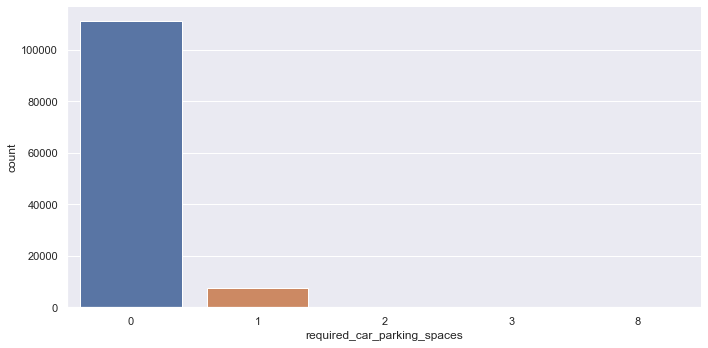

In [64]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,10)})
sns.catplot(x='required_car_parking_spaces', 
            data=df_baru, 
            kind="count",height = 5, aspect = 2)

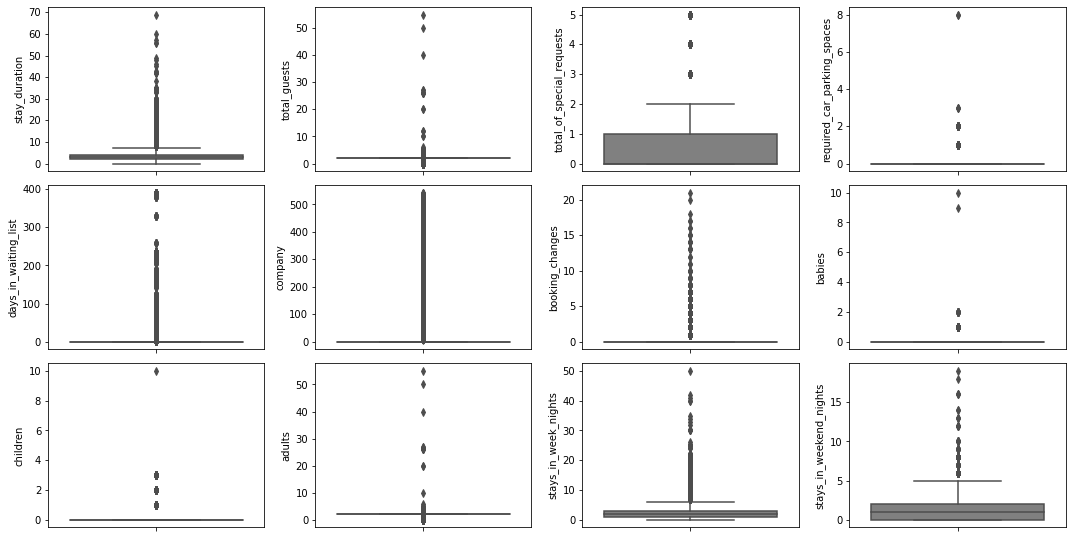

In [30]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

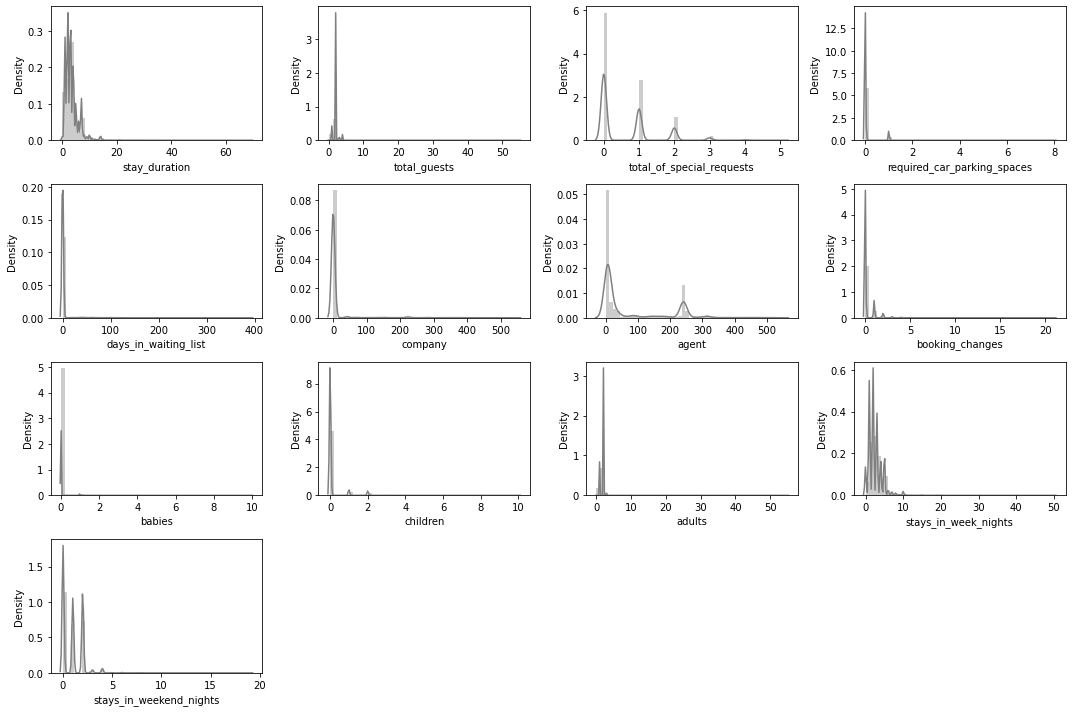

In [25]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

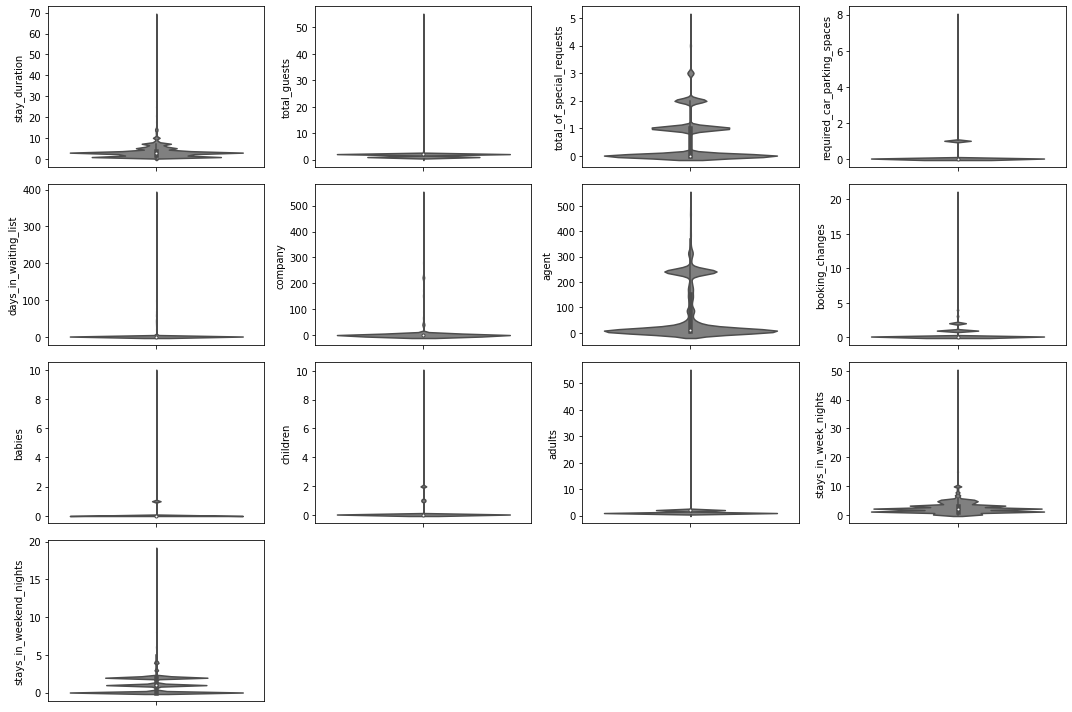

In [26]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [28]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,stay_duration
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363,1.968239,3.427900
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798,0.722394,2.557439
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2.000000,3.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,69.000000
